In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#Clustering Libraries
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering

#pre-processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

#scoring
from sklearn.metrics import silhouette_score 


In [2]:
ai_index=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\AI_index_db.csv")

In [3]:
ai_index

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sri Lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,Nascent,Lower middle,Electoral democracy
58,Egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,Nascent,Lower middle,Electoral autocracy
59,Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
60,Nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,Nascent,Lower middle,Electoral autocracy


In [36]:
ai_index.drop(["Political regime"],inplace=True,axis=1)

In [37]:
ai_index.info()
# OBSERVATION   -> There are 62 rows and 13 columns
""" Columns -> ['Country', 'Region', 'Cluster', 'Income group']   are object types
            -> ['Talent', 'Infrastructure', 'Operating Environment', 'Research',
                'Development', 'Government Strategy', 'Commercial', 'Total score'] are float type """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Development            62 non-null     float64
 5   Government Strategy    62 non-null     float64
 6   Commercial             62 non-null     float64
 7   Total score            62 non-null     float64
 8   Region                 62 non-null     object 
 9   Cluster                62 non-null     object 
 10  Income group           62 non-null     object 
dtypes: float64(7), object(4)
memory usage: 5.5+ KB


" Columns -> ['Country', 'Region', 'Cluster', 'Income group']   are object types\n            -> ['Talent', 'Infrastructure', 'Operating Environment', 'Research',\n                'Development', 'Government Strategy', 'Commercial', 'Total score'] are float type "

In [38]:
missing_values=ai_index.isnull().sum()
missing_values_percentage= missing_values *100/len(ai_index)
missing_values_df=pd.DataFrame(data=[missing_values,missing_values_percentage],index=["Total", "%"]).T
missing_values_df


# OBSERVATION -> There are no null values present in the dataframe

,Total,%
Country,0.0,0.0
Talent,0.0,0.0
Infrastructure,0.0,0.0
Operating Environment,0.0,0.0
Development,0.0,0.0
Government Strategy,0.0,0.0
Commercial,0.0,0.0
Total score,0.0,0.0
Region,0.0,0.0
Cluster,0.0,0.0


In [39]:
ai_index.describe().T

,count,mean,std,min,25%,50%,75%,max
Talent,62.0,16.803065,15.214963,0.0,7.3650,13.445,24.5675,100.0
Infrastructure,62.0,63.503710,20.217525,0.0,55.8575,65.230,75.9475,100.0
Operating Environment,62.0,66.925484,20.000424,0.0,58.1075,69.505,80.5000,100.0
Development,62.0,14.824677,19.419279,0.0,1.2025,9.005,19.9800,100.0
Government Strategy,62.0,57.865645,26.252448,0.0,41.0300,63.930,77.9525,100.0
Commercial,62.0,6.171935,14.029632,0.0,0.6975,2.585,5.3075,100.0
Total score,62.0,23.914677,15.123586,0.0,14.8050,23.220,30.4875,100.0


#### Description of the numeric Columns

1. Talent indicator focuses on the availability of skilled practitioners for the provision of artificial intelligence solutions.
2. Infrastructure indicator focuses on the reliability and scale of access infrastructure, from electricity and internet, to super computing capabilities.
3. Operating Environment indicator focuses on the regulatory context, and public opinion surrounding artificial intelligence.
4. Research indicator focuses on the extent of specialist research and researchers; investigating the amount of publications and citations in credible academic journals.
5. Development indicator focuses on the development of fundamental platforms and algorithms upon which innovative artificial intelligence projects rely.
6. Government Strategy indicator focuses on the depth of commitment from national government to artificial intelligence; investigating spending commitments and national strategies.
7. Commercial indicator focuses on the level of startup activity, investment and business initiatives based on artificial intelligence.

In [40]:
# Statistical descripton of object type columns  
ai_index.describe(include="object").T

,count,unique,top,freq
Country,62,62,United States of America,1
Region,62,5,Europe,29
Cluster,62,5,Waking up,40
Income group,62,3,High,43


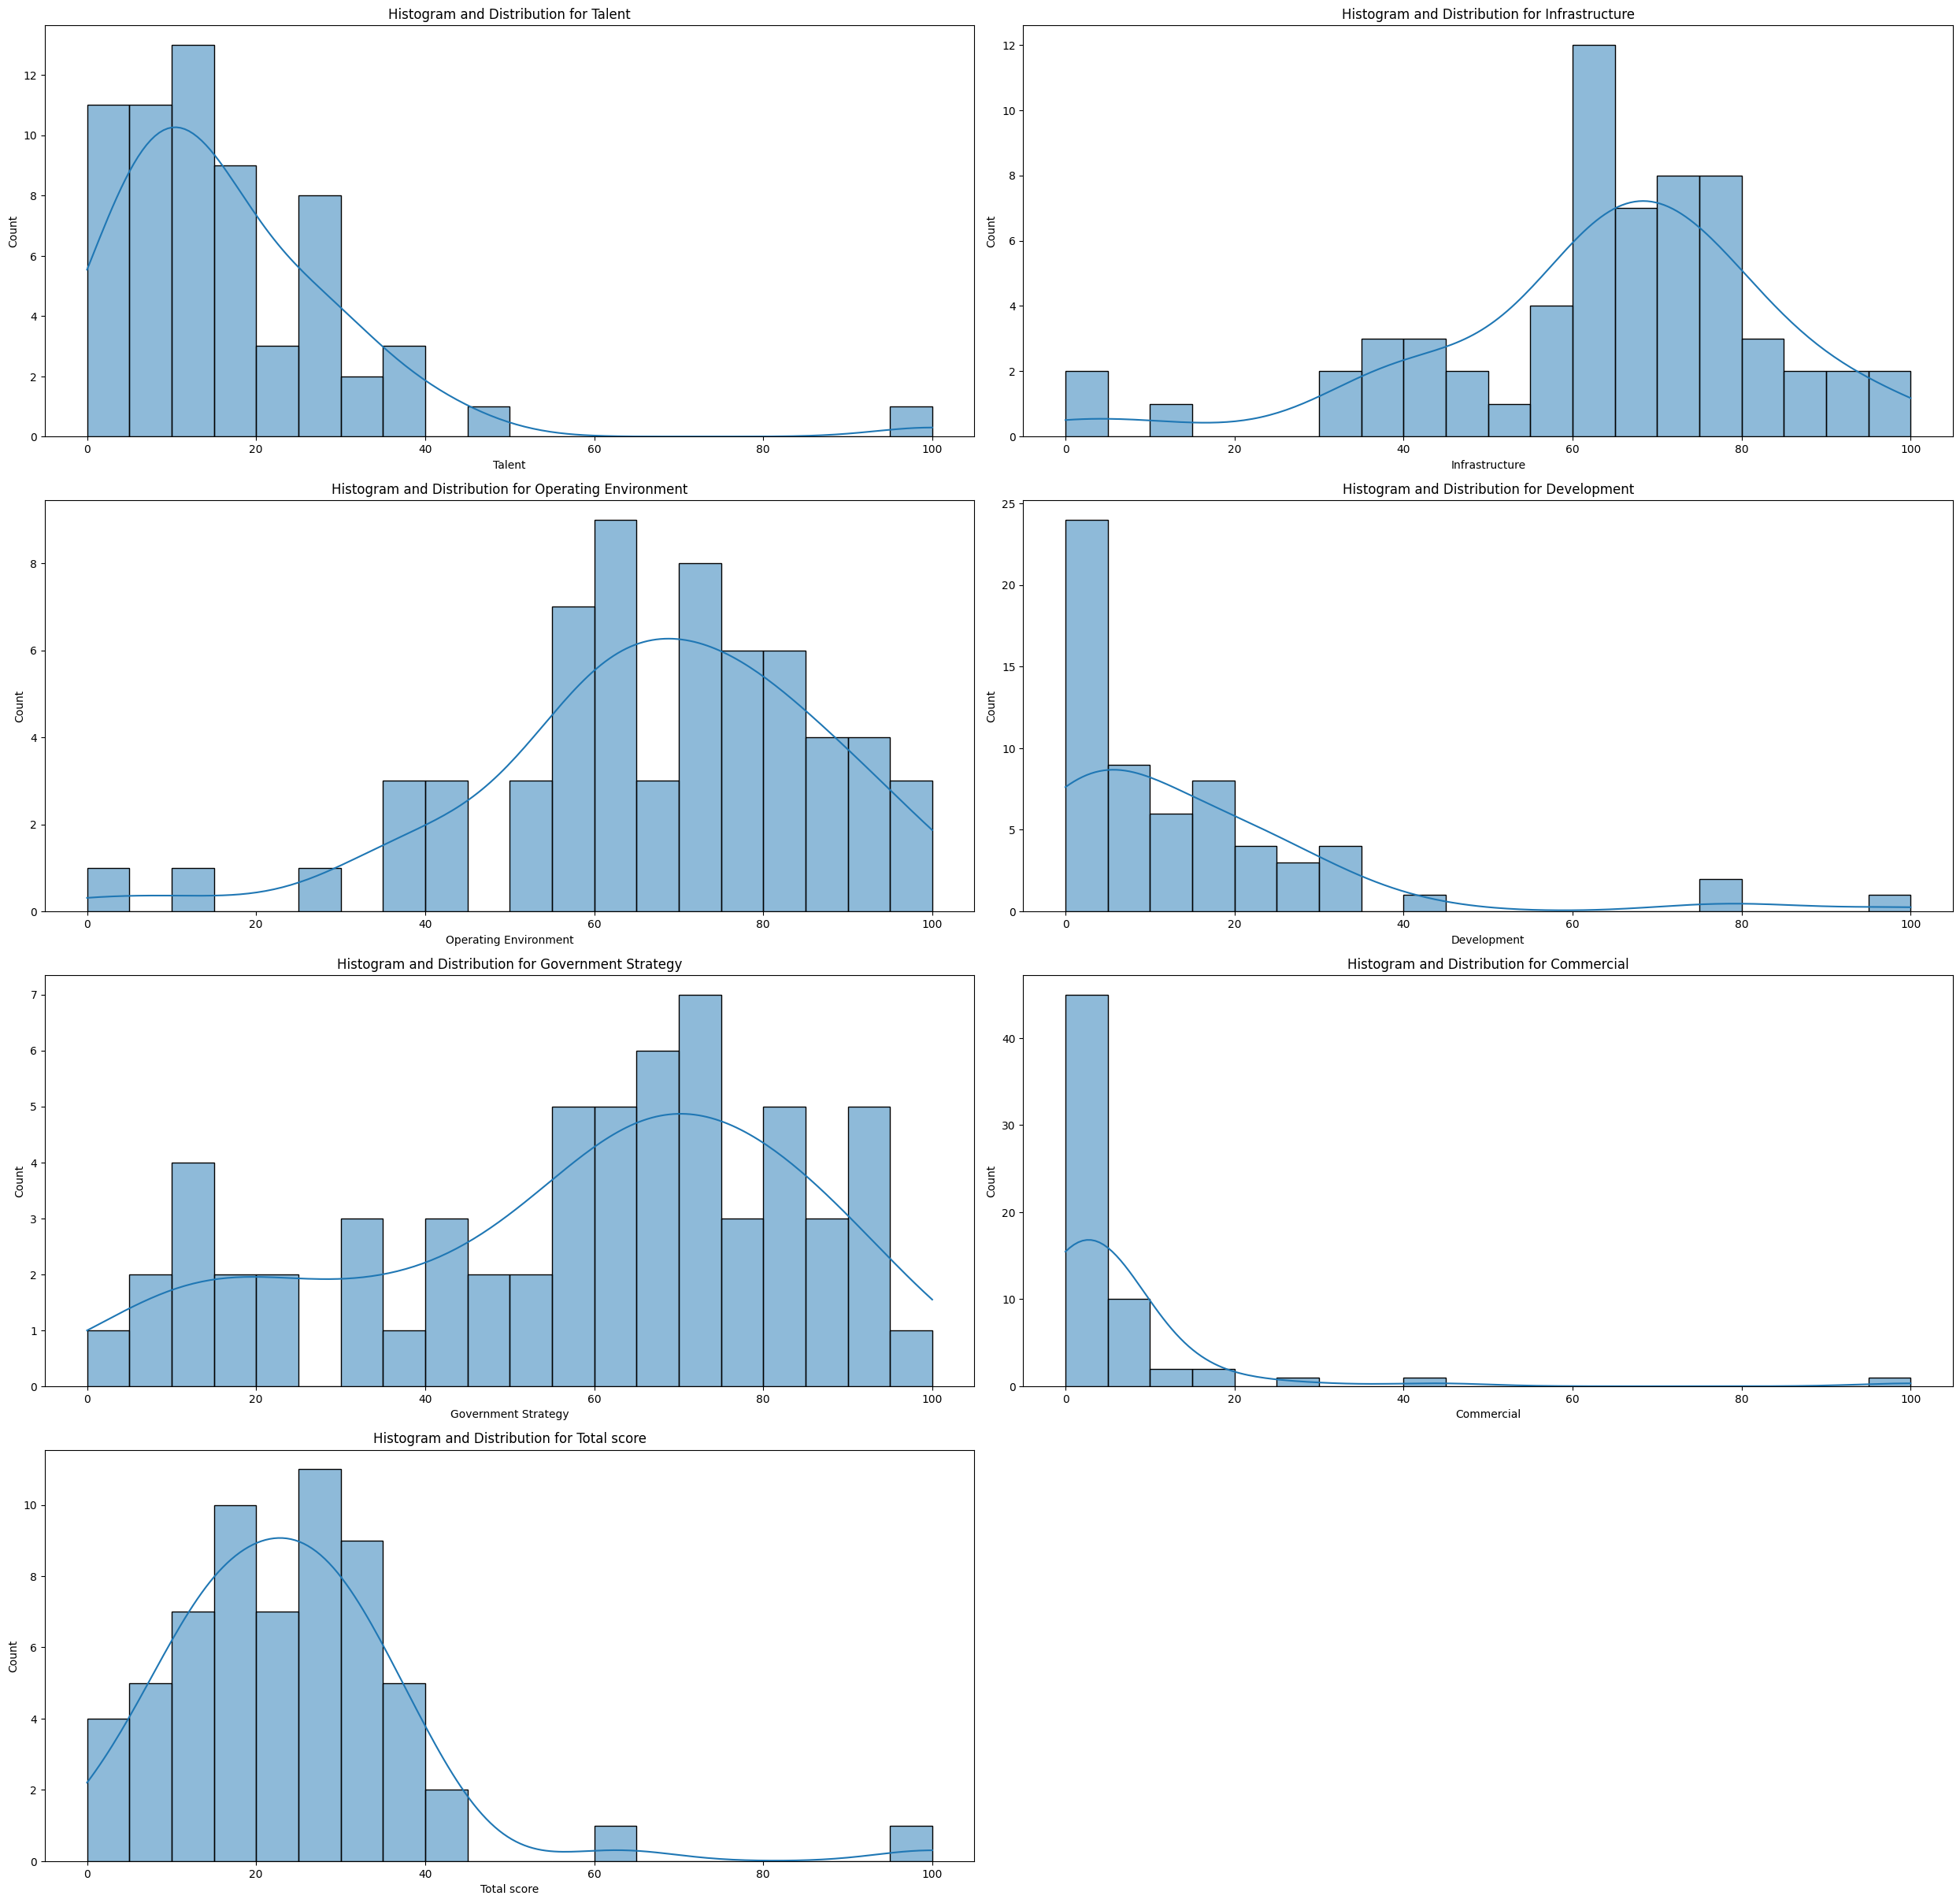

In [41]:
num_cols=ai_index.select_dtypes(np.number).columns
plt.figure(figsize=(25,60))
for i, col in enumerate(ai_index[num_cols].columns, 1):
    plt.subplot(10, 2, i)
    sns.histplot(data=ai_index, x=col, kde=True, bins=20)
    plt.title(f"Histogram and Distribution for {col}")
   
plt.tight_layout()
plt.show()

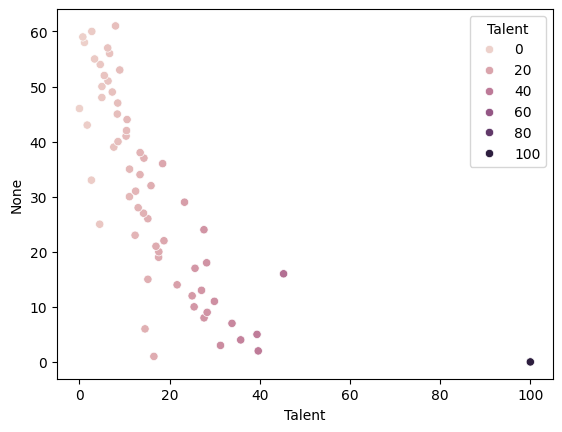

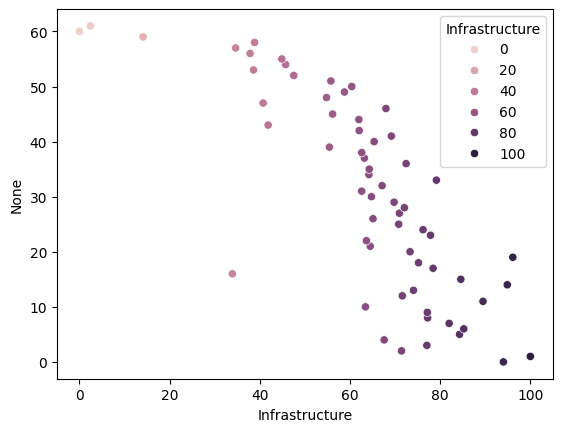

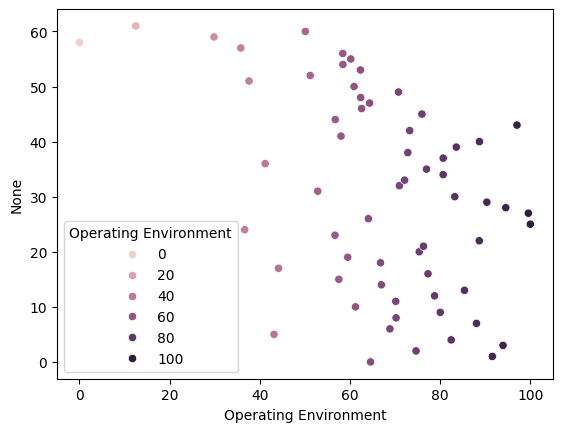

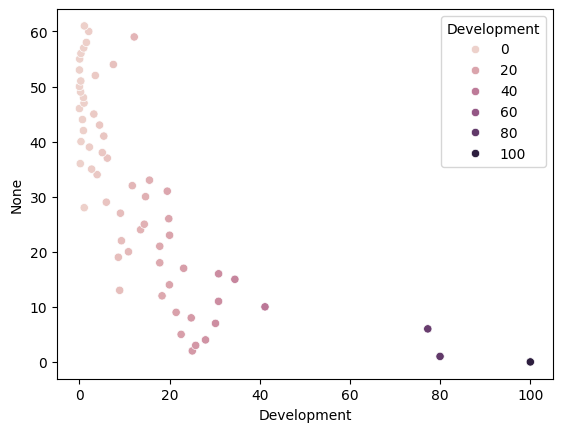

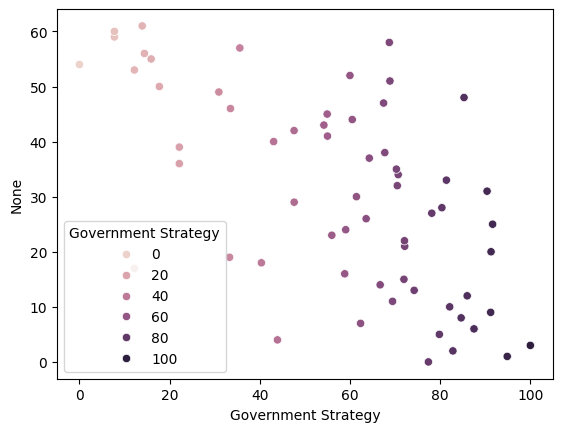

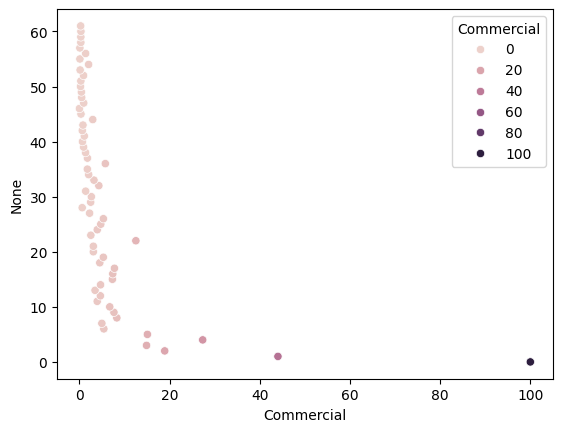

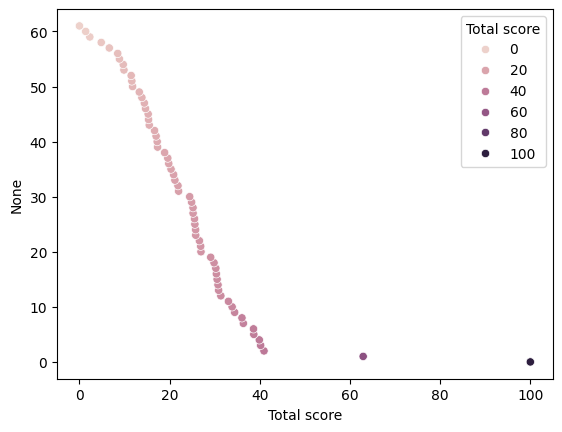

In [42]:
for col in ai_index[num_cols].columns:
    plt.figure()
    sns.scatterplot(x=ai_index[col],data=ai_index,y=ai_index.index,hue=col)

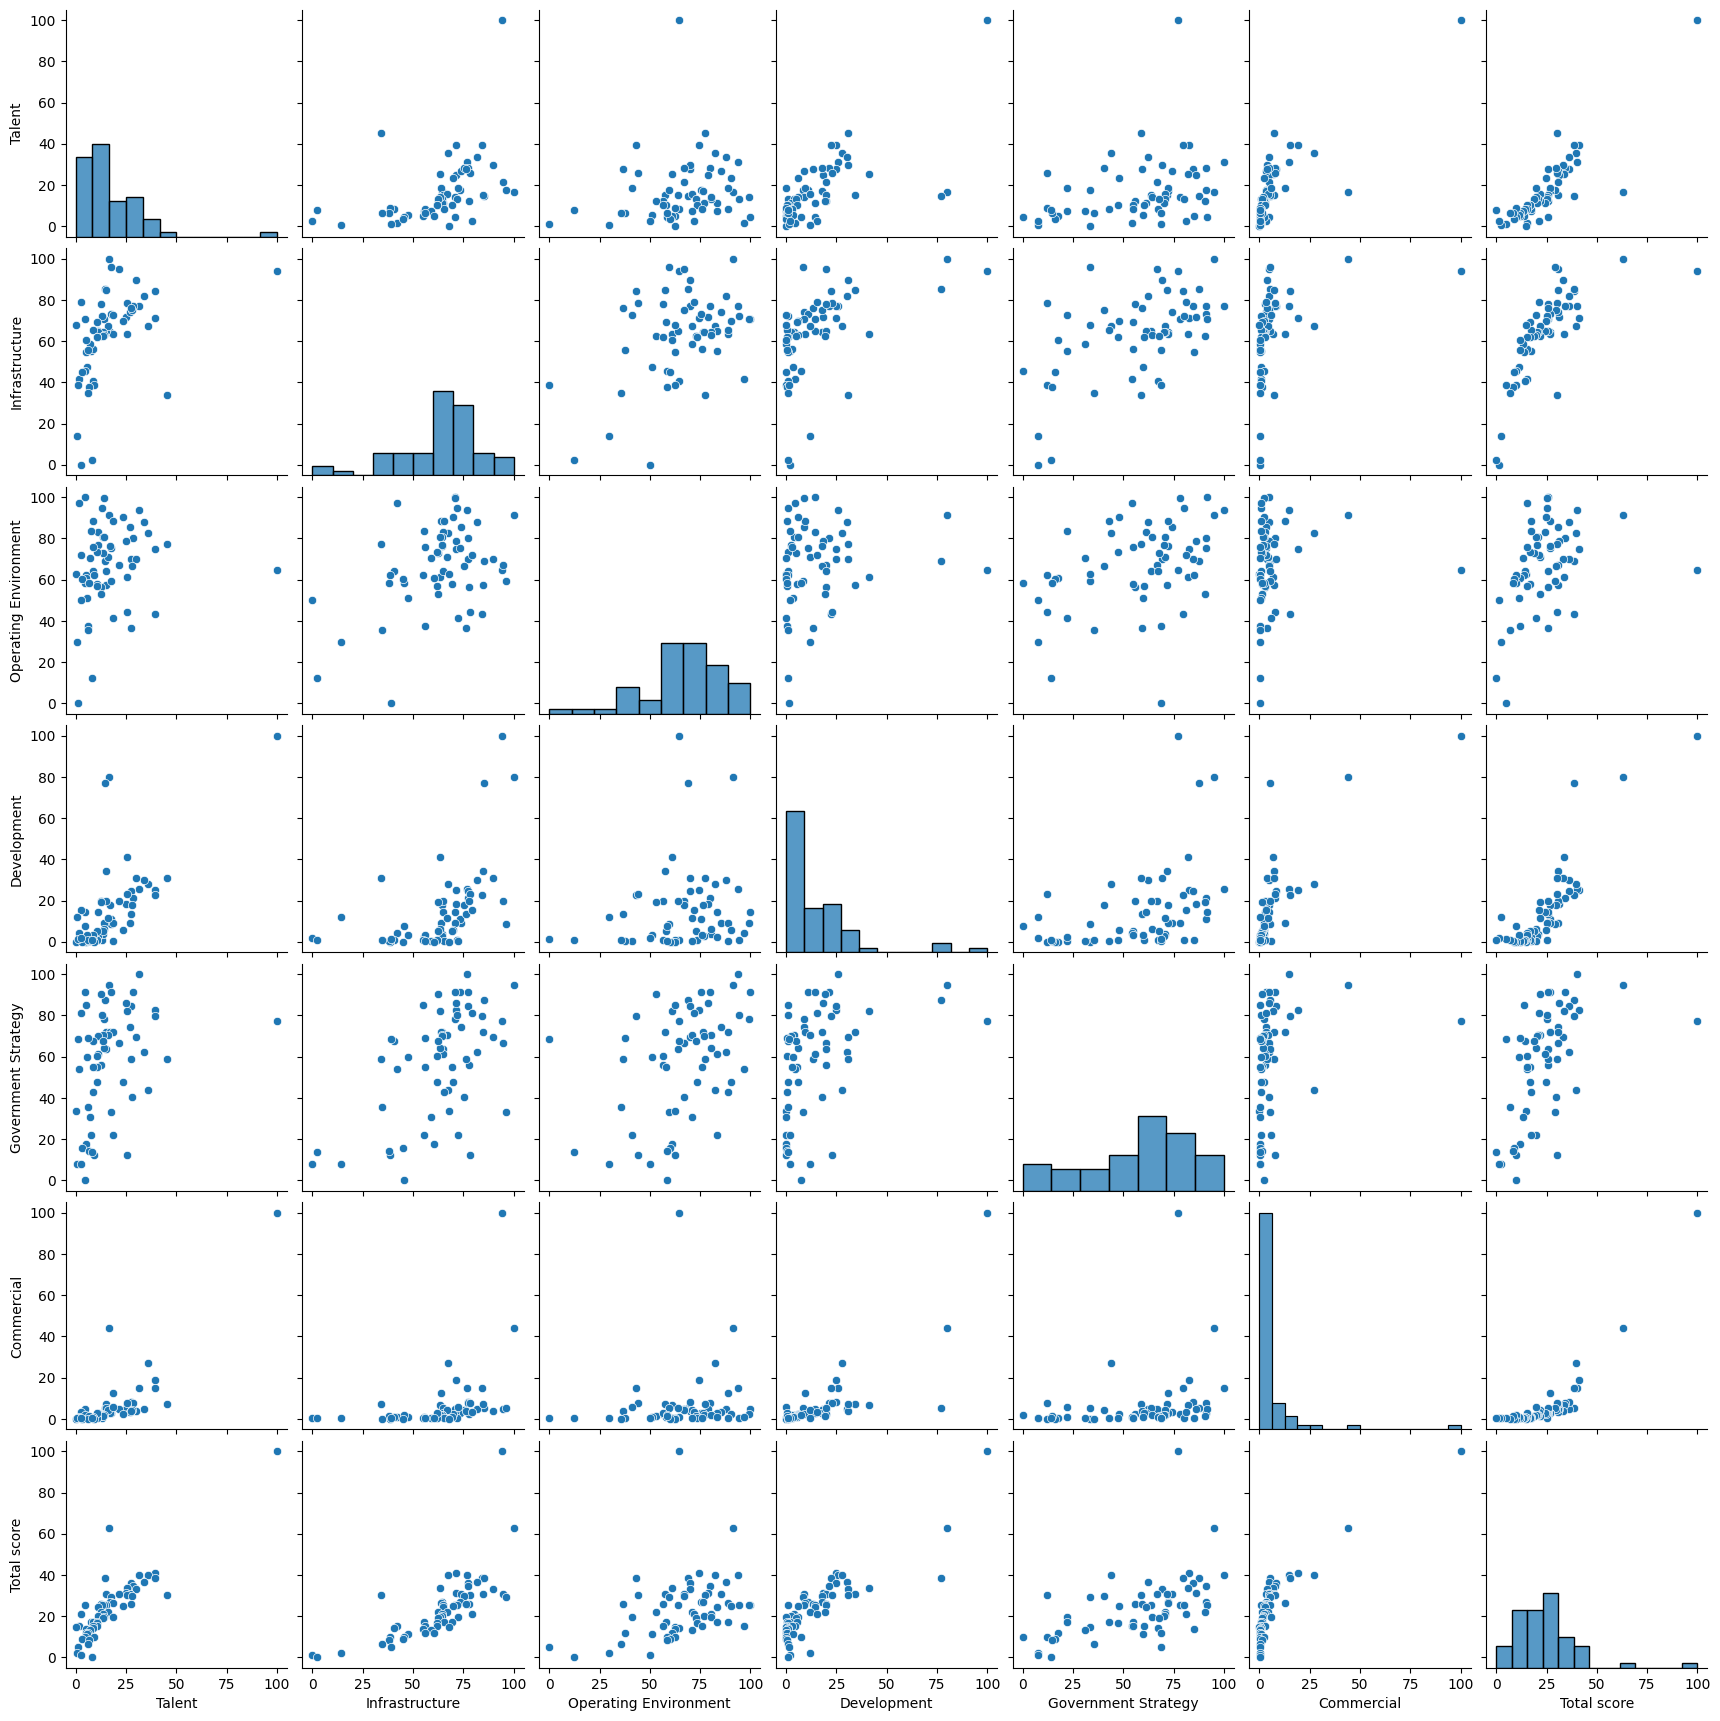

In [43]:
sns.pairplot(ai_index)

### Co-relation

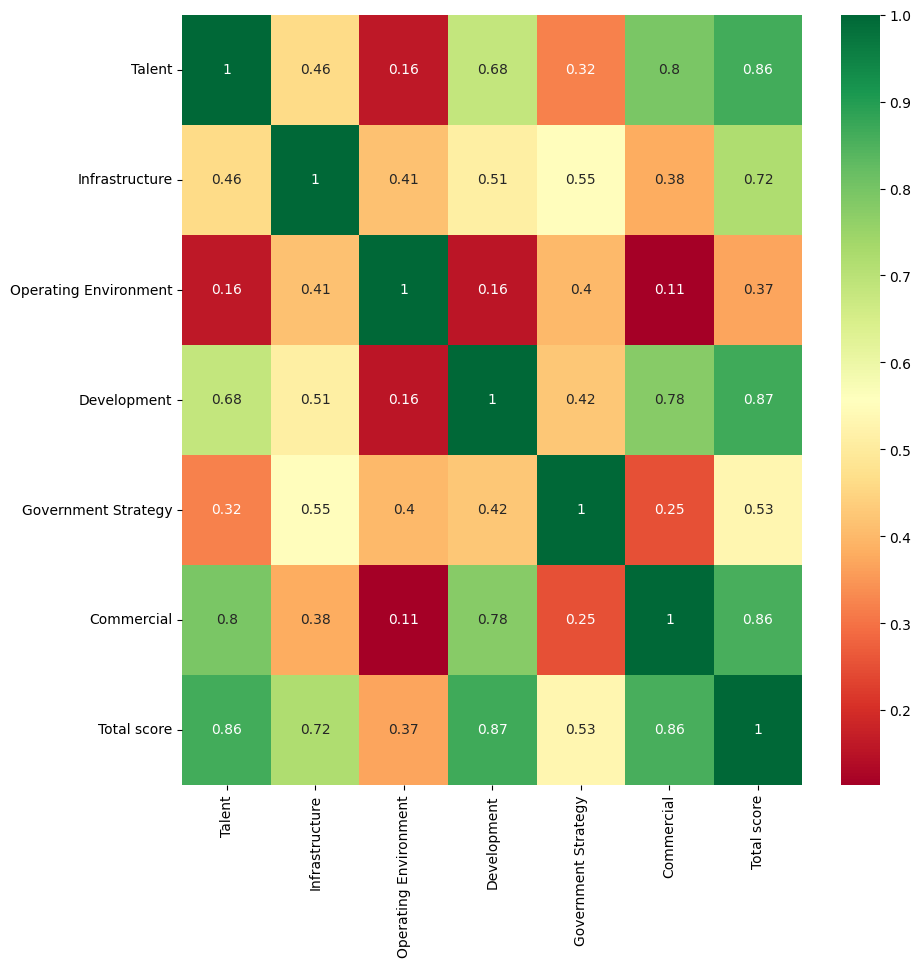

In [44]:
corr=ai_index[num_cols].corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [12]:
ai_index.drop(["Research"],axis=1,inplace=True)

In [13]:
num_cols=num_cols.drop("Research")

### Checking for Outliers

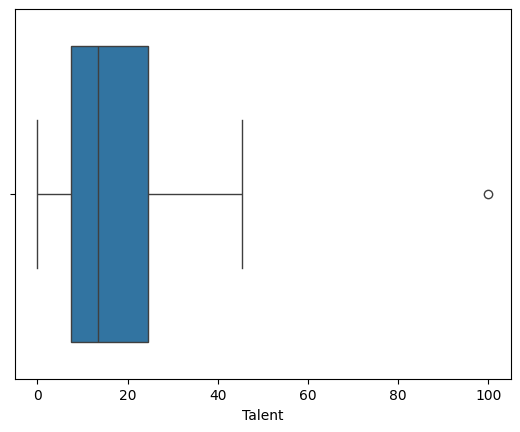

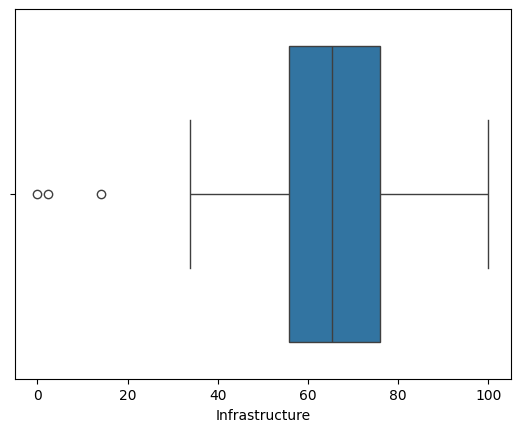

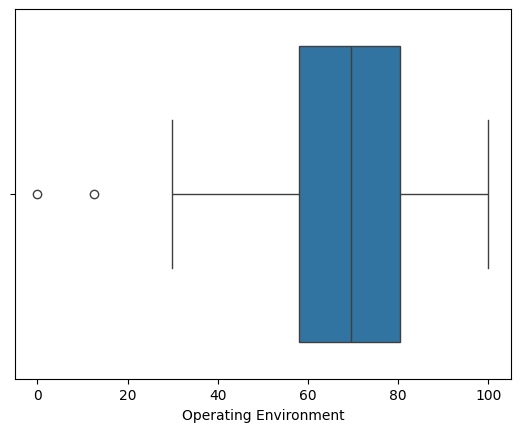

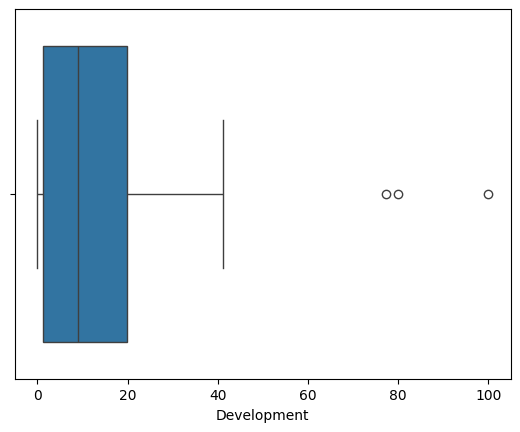

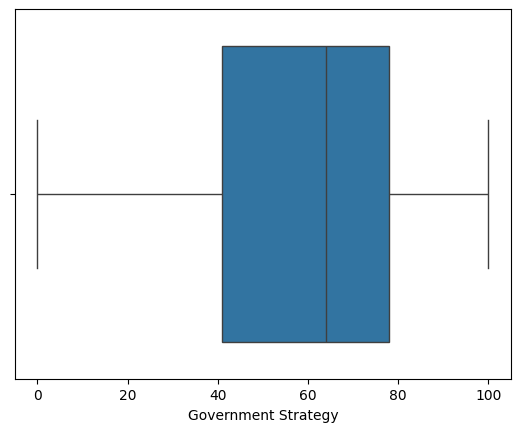

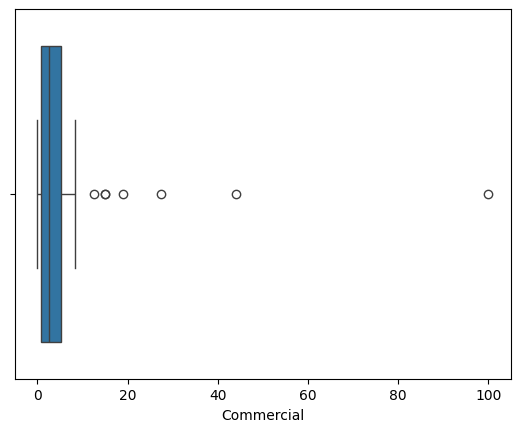

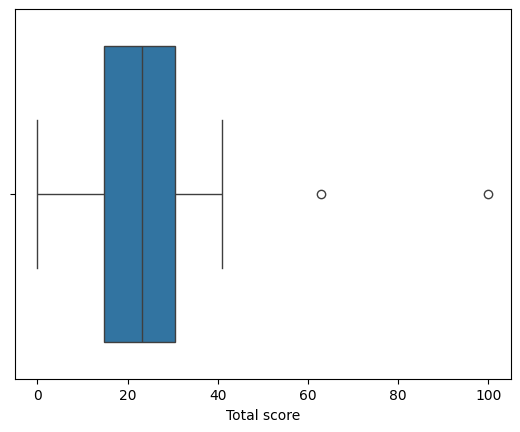

In [45]:
for col in ai_index[num_cols]:
    plt.figure()
    sns.boxplot(x=ai_index[col]) 

### Removal of Outliers

In [46]:
print('Before outlier removal : ',ai_index.shape)
numeric_df = ai_index.select_dtypes(include = [np.number])
z = zscore(numeric_df)
# print(z)
threshold = 3

dataset = ai_index[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (62, 11)
After Z-Score approach :  (59, 11)


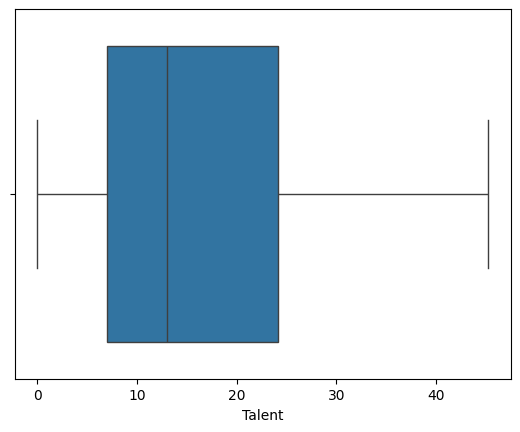

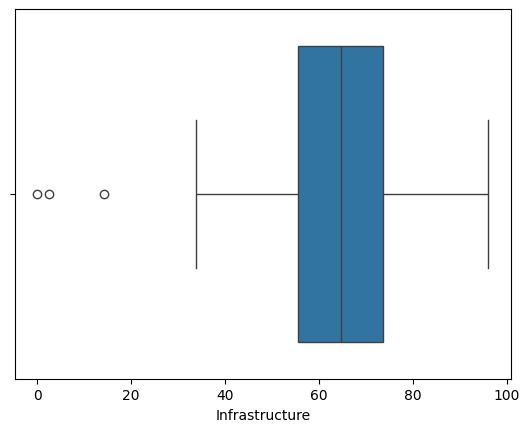

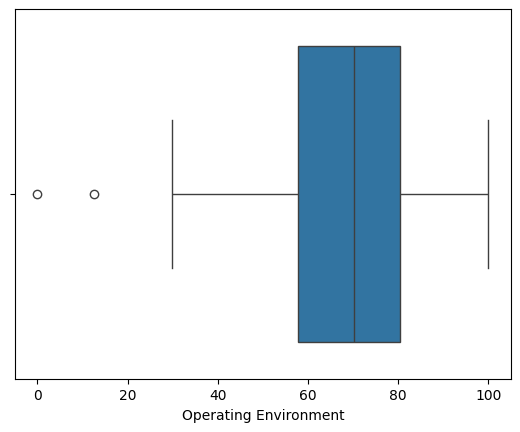

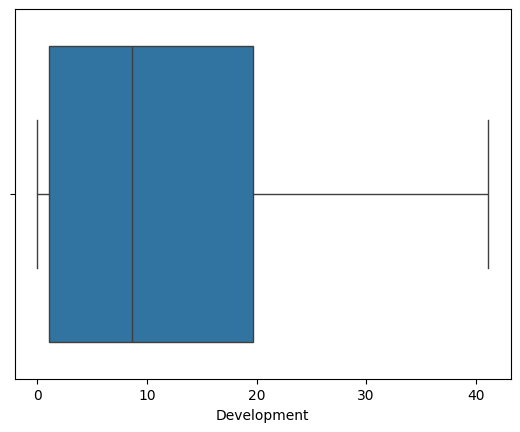

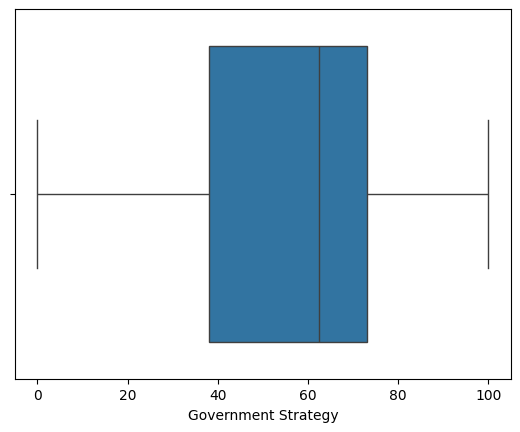

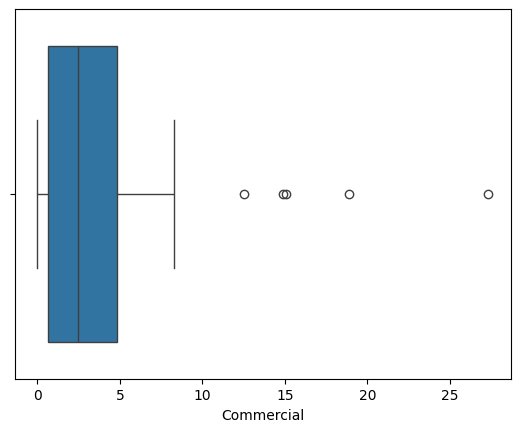

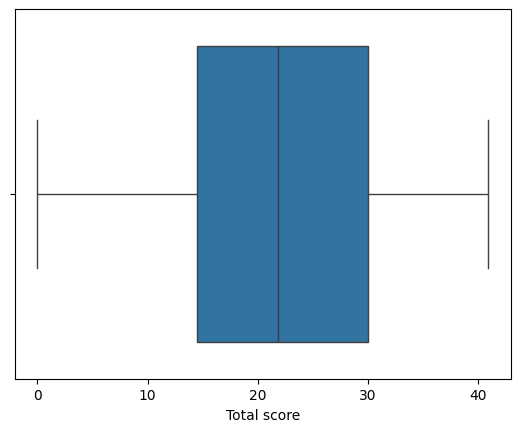

In [47]:
for col in ai_index[num_cols]:
    plt.figure()
    sns.boxplot(x=dataset[col]) 

In [48]:
dataset[num_cols].skew()

Talent                   0.788411
Infrastructure          -1.219771
Operating Environment   -0.882935
Development              0.791530
Government Strategy     -0.557398
Commercial               2.593011
Total score             -0.105869
dtype: float64

In [49]:
dataset[num_cols].kurt()

Talent                  -0.127495
Infrastructure           2.073837
Operating Environment    1.337185
Development             -0.345812
Government Strategy     -0.720749
Commercial               8.244994
Total score             -0.660646
dtype: float64

##### Since the Skewness and Kurtosis of the dataset in within the range ,so we don't need to transform the data

In [50]:
# As There are still outliers in the dataset i'm uskng the robust scaling

scaler = RobustScaler()

df_scaled = scaler.fit_transform(dataset[num_cols])

In [51]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=df_pca)
len(pca.explained_variance_ratio_)

7

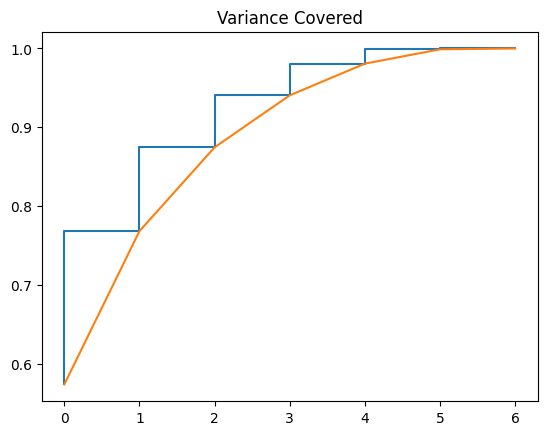

In [52]:
plt.step(list(range(0,7)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,7))
plt.title("Variance Covered")
plt.show()

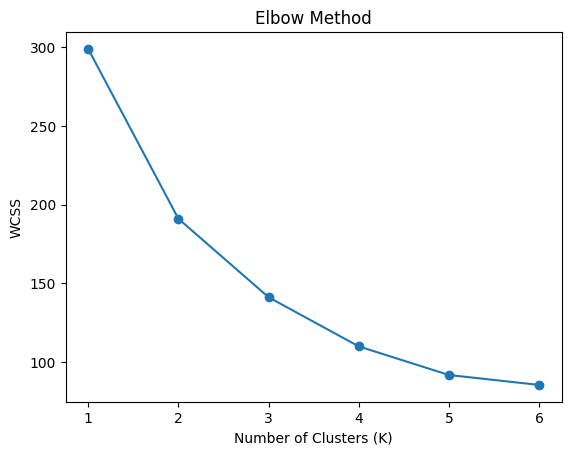

np.int64(3)

In [57]:
wcss = []
for k in range(1,7):   # Try 1–10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,7), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

from kneed import KneeLocator
knee = KneeLocator(range(1,7), wcss, curve="convex", direction="decreasing")
knee.elbow

In [58]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_scaled)

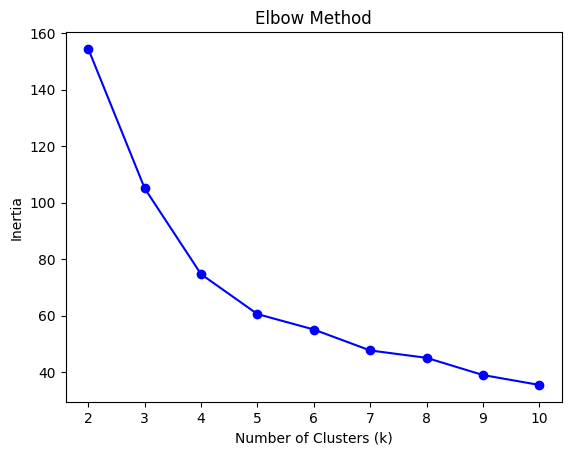

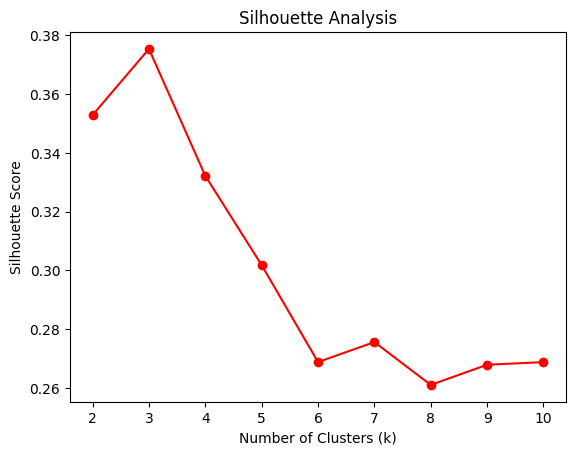

In [59]:
#Finding the optimal K value

inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

# Plot elbow curve
plt.plot(K, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot silhouette scores
plt.plot(K, sil_scores, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

In [60]:

kmeans = KMeans(n_clusters=3, random_state=42, n_init=100)
labels = kmeans.fit_predict(df_scaled)
dataset['Cluster'] = labels

C:\Users\BAPS\AppData\Local\Temp\ipykernel_17392\1204046165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = labels


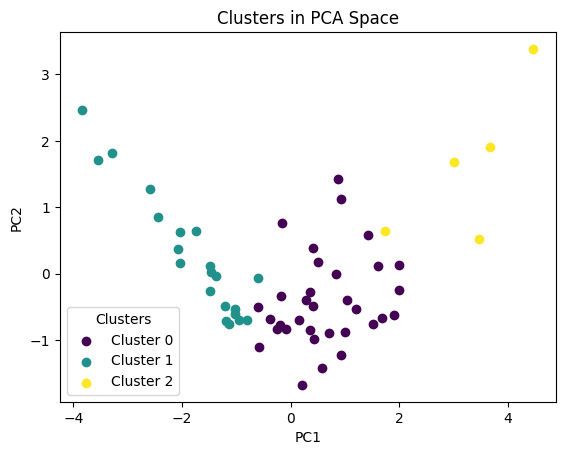

In [61]:
unique_labels = np.unique(labels)

# Choose a colormap
cmap = plt.get_cmap('viridis', len(unique_labels))

# Plot each cluster separately for legend
for cluster in unique_labels:
    plt.scatter(X_pca[labels==cluster, 0], 
                X_pca[labels==cluster, 1],
                color=cmap(cluster),
                label=f'Cluster {cluster}')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters in PCA Space")
plt.legend(title="Clusters")
plt.show()

In [62]:
ai_index

,Country,Talent,Infrastructure,Operating Environment,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group
0,United States of America,100.00,94.02,64.56,100.00,77.39,100.00,100.00,Americas,Power players,High
1,China,16.51,100.00,91.57,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle
2,United Kingdom,39.65,71.43,74.65,25.03,82.82,18.91,40.93,Europe,Traditional champions,High
3,Canada,31.28,77.05,93.94,25.78,100.00,14.88,40.19,Americas,Traditional champions,High
4,Israel,35.76,67.58,82.44,27.96,43.91,27.33,39.89,Middle East,Rising stars,High
...,...,...,...,...,...,...,...,...,...,...,...
57,Sri Lanka,6.27,34.64,35.79,0.95,35.57,0.09,6.62,Asia-Pacific,Nascent,Lower middle
58,Egypt,1.11,38.84,0.00,1.54,68.72,0.31,4.83,Middle East,Nascent,Lower middle
59,Kenya,0.75,14.11,29.84,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle
60,Nigeria,2.74,0.00,50.10,2.06,7.75,0.33,1.38,Africa,Nascent,Lower middle


In [63]:
features=['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Development', 'Government Strategy', 'Commercial', 'Total score',
       'Region', 'Cluster', 'Income group', 'Political regime']

cluster_summary=dataset.groupby("Cluster")[num_cols].agg(["mean","std","count"]).round(2)

In [64]:
cluster_summary.T

Cluster                          0      1      2
Talent                mean   19.00   5.66  32.96
                      std     9.06   3.12   8.64
                      count  33.00  21.00   5.00
Infrastructure        mean   71.92  43.83  72.80
                      std    11.21  18.73   8.11
                      count  33.00  21.00   5.00
Operating Environment mean   72.05  55.42  76.57
                      std    15.76  22.49  20.02
                      count  33.00  21.00   5.00
Development           mean   15.40   2.05  22.13
                      std    10.47   2.96   7.42
                      count  33.00  21.00   5.00
Government Strategy   mean   65.76  37.11  75.73
                      std    19.46  25.42  20.51
                      count  33.00  21.00   5.00
Commercial            mean    3.96   0.66  17.74
                      std     2.20   0.71   5.83
                      count  33.00  21.00   5.00
Total score           mean   26.42  10.63  37.26
                      std     5.45   5.13   6.01
                      count  33.00  21.00   5.00

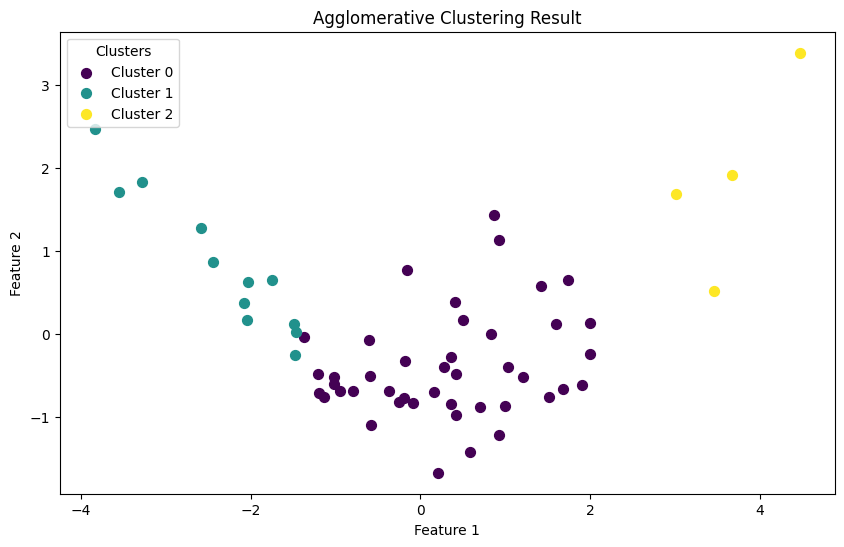

In [65]:
from sklearn.cluster import AgglomerativeClustering
# Initialize the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict cluster labels
y_agg = agg_clustering.fit_predict(X_pca)

# Unique clusters
unique_labels = np.unique(y_agg)

# Colormap
cmap = plt.get_cmap('viridis', len(unique_labels))

plt.figure(figsize=(10, 6))

# Plot each cluster separately for legend
for cluster in unique_labels:
    plt.scatter(X_pca[y_agg==cluster, 0],
                X_pca[y_agg==cluster, 1],
                s=50,
                color=cmap(cluster),
                label=f'Cluster {cluster}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering Result')
plt.legend(title="Clusters")
plt.show()

In [30]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=2, max_eps=0.00002)
clustering.fit(X_pca)

optics_labels = clustering.labels_
print(len(optics_labels))

59


c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:662: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(


In [31]:
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [32]:
from sklearn.metrics import silhouette_score

if len(set(optics_labels)) > 1:
    score = silhouette_score(df_pca, optics_labels)
    print("Silhouette Score:", score)

### OPTICS

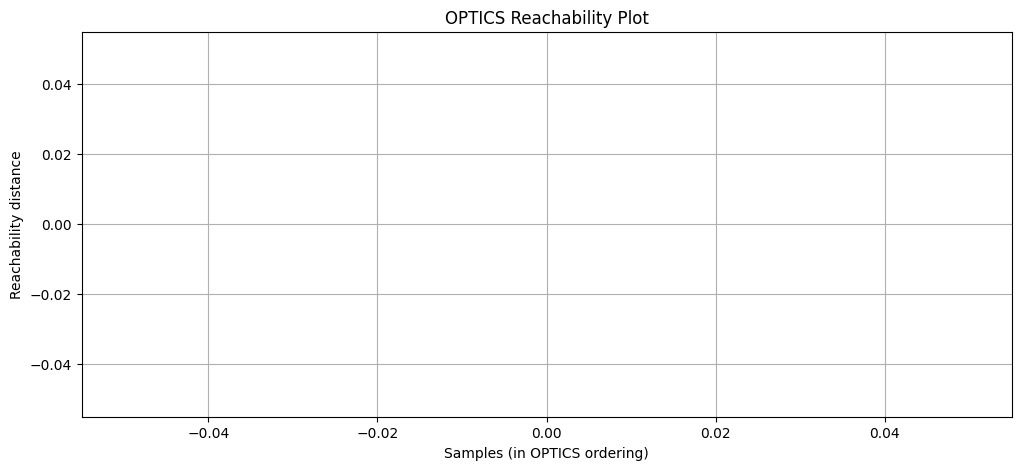

C:\Users\BAPS\AppData\Local\Temp\ipykernel_17392\526909297.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab20', np.max(labels)+2)


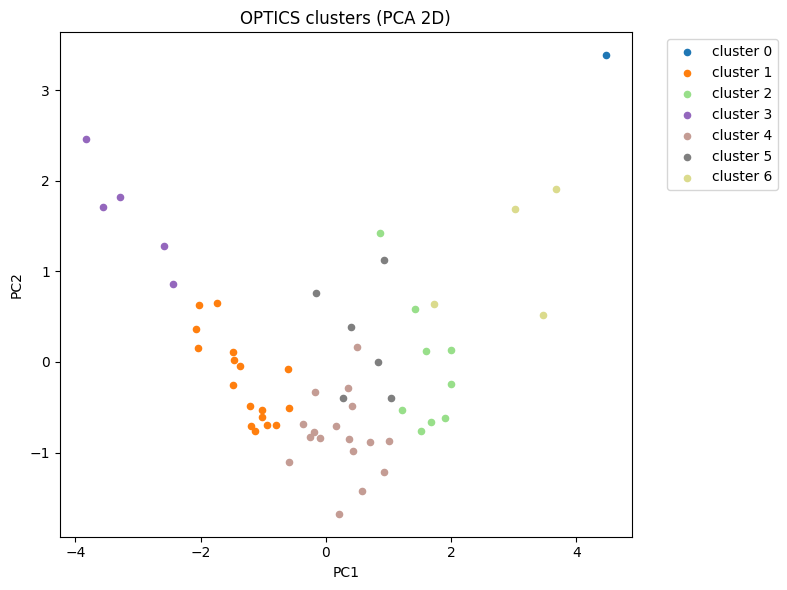

In [33]:
reachability = clustering.reachability_
plt.figure(figsize=(12,5))
ordering = clustering.ordering_            # order in which points are processed
core_distances = clustering.core_distances_
space = np.arange(len(reachability))
# plot reachability by the ordering returned by OPTICS
plt.plot(space, reachability[ordering], marker='.', linestyle='-', alpha=0.6)
plt.ylabel('Reachability distance')
plt.xlabel('Samples (in OPTICS ordering)')
plt.title('OPTICS Reachability Plot')
plt.grid(True)
plt.show()

# ---------- 2D visualization (PCA) ----------
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(df_scaled)


plt.figure(figsize=(8,6))
# color noise as grey
palette = plt.cm.get_cmap('tab20', np.max(labels)+2)
for lab in np.unique(labels):
    mask = labels == lab
    if lab == -1:
        # noise
        plt.scatter(X_pca2[mask,0], X_pca2[mask,1], c='lightgrey', s=10, label='noise')
    else:
        plt.scatter(X_pca2[mask,0], X_pca2[mask,1], s=20, label=f'cluster {lab}', 
                    color=palette(lab % (palette.N)))
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('OPTICS clusters (PCA 2D)')
plt.tight_layout()
plt.show()

Cluster counts (label: count):
 -1    59

Cluster summary (means and stds):
               Talent        Infrastructure       Operating Environment  \
                 mean    std           mean   std                  mean   
DBSCAN_cluster                                                            
-1              15.44  11.05           62.0  19.5                 66.52   

                      Development        Government Strategy         \
                  std        mean    std                mean    std   
DBSCAN_cluster                                                        
-1              20.25       11.22  10.86               56.41  26.03   

               Commercial       Total score         
                     mean   std        mean    std  
DBSCAN_cluster                                      
-1                   3.95  5.05       21.72  10.29  


C:\Users\BAPS\AppData\Local\Temp\ipykernel_17392\2019189951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DBSCAN_cluster'] = labels
C:\Users\BAPS\AppData\Local\Temp\ipykernel_17392\2019189951.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab20', np.max(labels)+2)


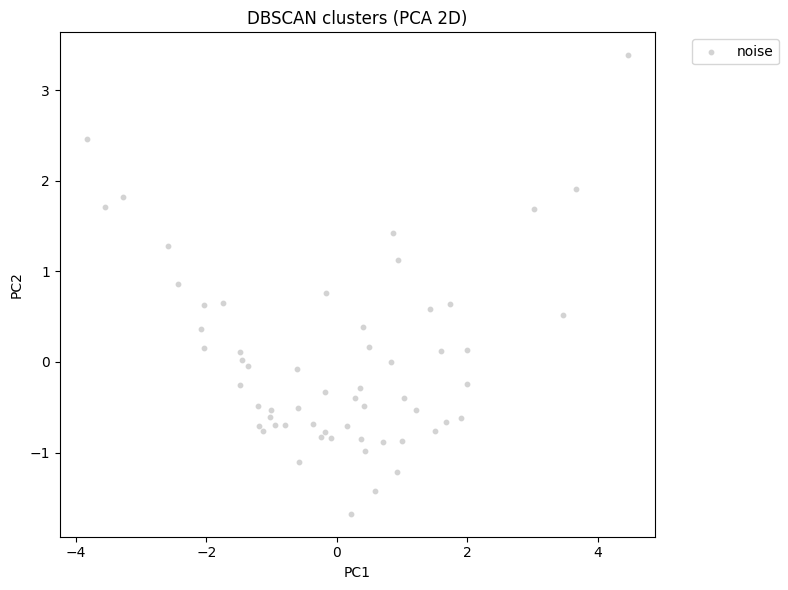

In [35]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels = db.fit_predict(df_scaled)

# Save labels
dataset['DBSCAN_cluster'] = labels

# ---------- Cluster info ----------
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = pd.Series(counts, index=unique).sort_index()
print("Cluster counts (label: count):\n", cluster_counts.to_string())

# Cluster summary (mean/std) for your numeric columns
cluster_summary = dataset.groupby('DBSCAN_cluster')[num_cols].agg(['mean','std']).round(2)
print("\nCluster summary (means and stds):")
print(cluster_summary)

# ---------- 2D visualization (PCA) ----------
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
palette = plt.cm.get_cmap('tab20', np.max(labels)+2)

for lab in np.unique(labels):
    mask = labels == lab
    if lab == -1:
        # noise
        plt.scatter(X_pca2[mask,0], X_pca2[mask,1], c='lightgrey', s=10, label='noise')
    else:
        plt.scatter(X_pca2[mask,0], X_pca2[mask,1], s=20, label=f'cluster {lab}',
                    color=palette(lab % (palette.N)))
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('DBSCAN clusters (PCA 2D)')
plt.tight_layout()
plt.show()
